**<font size="6" color="red">ch13. 데이터시각화</font>**

In [135]:
# 부팅후 설정해야할 것들
import matplotlib
import matplotlib.pyplot as plt
#그래프 고해상도 설정
%config InlineBackend.figure_format='retina'
# 한글설정
plt.rc('font',family='Malgun Gothic') #윈도우즈(X축)
plt.rc('axes',unicode_minus=False) # Y축

# 3. Seaborn

- matplotlib을 기반으로 만든 고수준 그래픽 라이브러리
    - 공식사이트 : https://seaborn.pydata.org <br>
    - API : https://seaborn.pydata.org/api.html <br>
- seaborn으로 그래프를 그리기 위해서 다음 단계를 따릅니다.
<pre>1) 데이터 준비
 2) 미적속성 설정
 3) 함수를 이용하여 그래프 그리기
 4) 그래프 출력,저장</pre>

## 3.1 데이터 준비하기

In [3]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris.info() # 결측치를 제외한 개수,dtype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
iris.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
iris.describe(include = 'all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [10]:
iris.describe(exclude ='float64')

,species
count,150
unique,3
top,setosa
freq,50


In [12]:
# R 패키지의 데이터 셋가져오기 (Titanic)
import statsmodels.api as sm
r_titanic = sm.datasets.get_rdataset('Titanic',package='datasets').data
r_titanic

,Class,Sex,Age,Survived,Freq
0,1st,Male,Child,No,0
1,2nd,Male,Child,No,0
2,3rd,Male,Child,No,35
3,Crew,Male,Child,No,0
4,1st,Female,Child,No,0
5,2nd,Female,Child,No,0
6,3rd,Female,Child,No,17
7,Crew,Female,Child,No,0
8,1st,Male,Adult,No,118
9,2nd,Male,Adult,No,154


In [14]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


## 3.2 미적 속성 설정하기

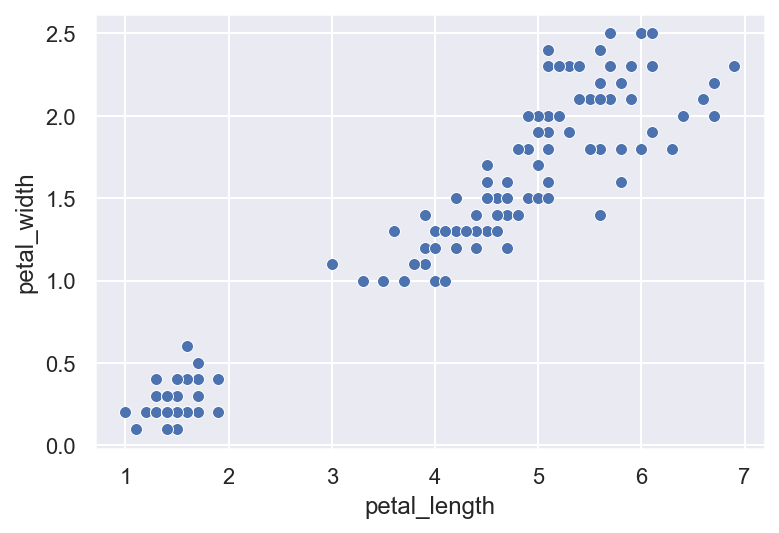

In [19]:
# style : white(기본),whitegrid,dark,darkgrid,...
sns.set(style='darkgrid')
ax = sns.scatterplot(x='petal_length',y='petal_width',data=iris)

**2) 파레트 설정**

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

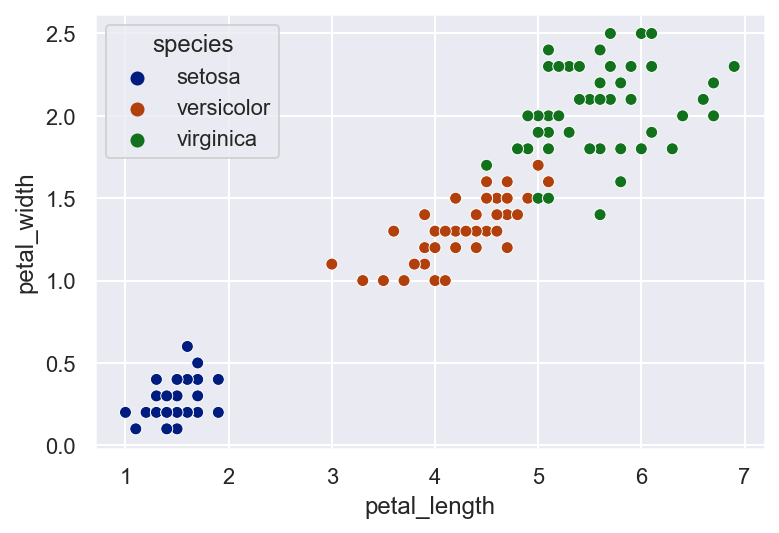

In [35]:
# hue : 지정된 범주에 따라 색상다르게 표현
#palette,style은 한번 설정하면 계속 유지됨
sns.set(palette='dark')
# bright/deep/muted/pastel/dark/color blind/etc...
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species')

**3) 컨텍스트지정** (비율)

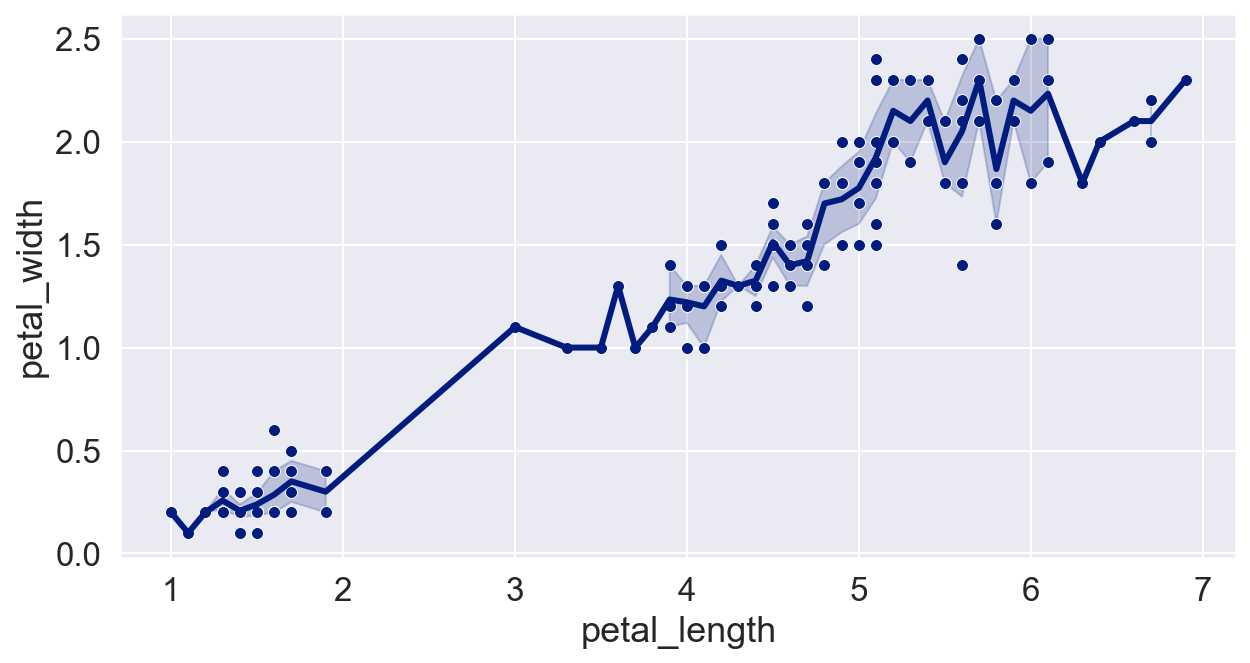

In [38]:
plt.figure(figsize=(10,5))
# notebook(기본;1배율),paper(0.8),talk(1.3),poster(1.6)
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':3})
sns.lineplot(x='petal_length',y='petal_width',data=iris)# 선 옆에 범위는 오차범위
sns.scatterplot(x='petal_length',y='petal_width',data=iris)
plt.show()

## 3.3 Seaborn 함수로 그래프 그리기

**1)Relational plots : 관계형 그래프 (연속 데이터)**

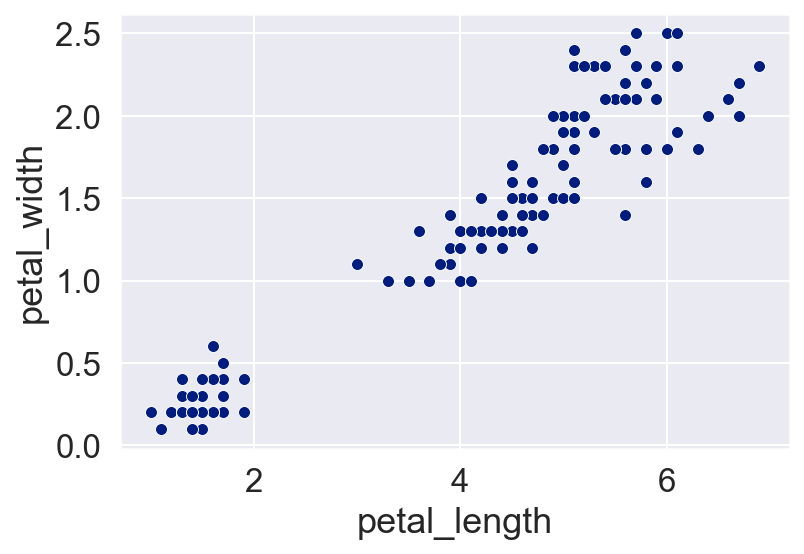

In [39]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris)
plt.show()

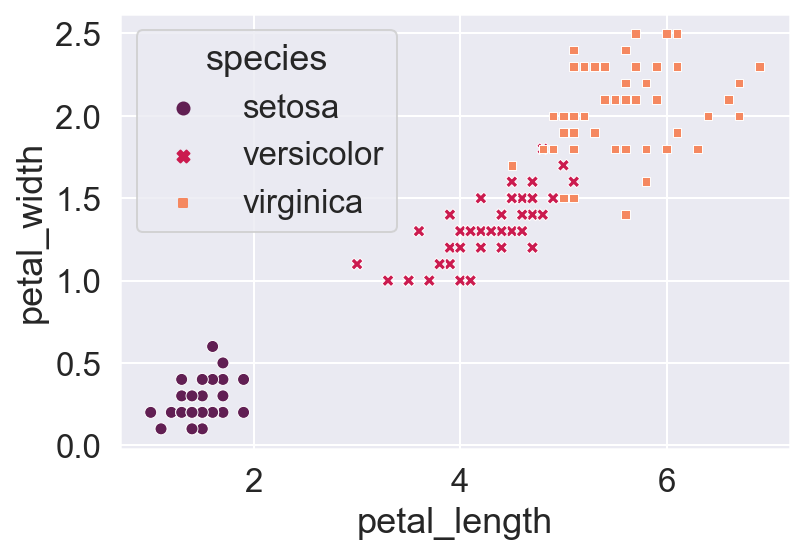

In [43]:
# hue 속성에 그룹변수를 넣어 그룹화하여 그룹별 다른 색상 다른style가능
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species'
               , palette='rocket',style='species')
plt.show()

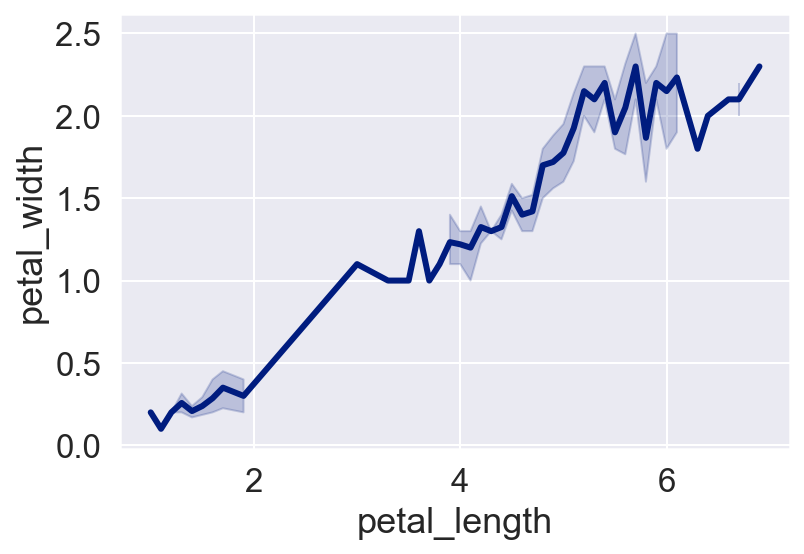

In [44]:
# lineplot
sns.lineplot(x='petal_length',y='petal_width',data=iris)
plt.show()

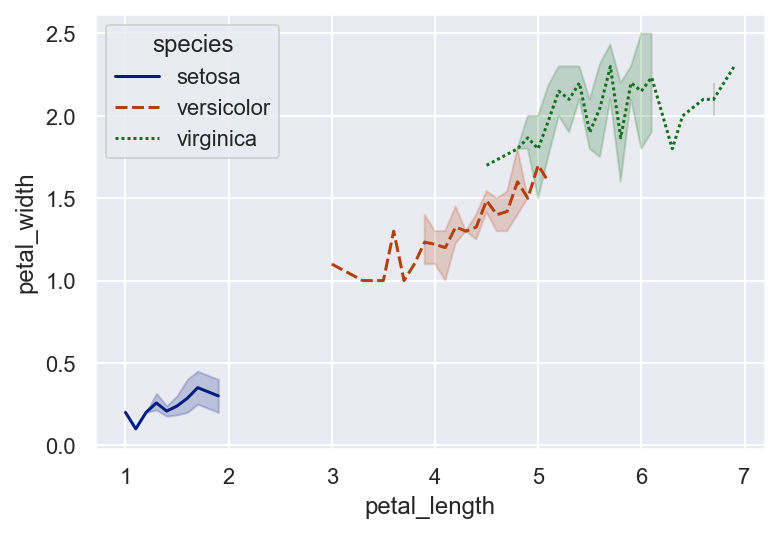

In [52]:
# line 에 hue
sns.lineplot(x='petal_length',y='petal_width',data=iris,hue='species',
            style='species',palette='dark')
## sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species',
##            style='species')
sns.set_context(font_scale=1)
plt.show()

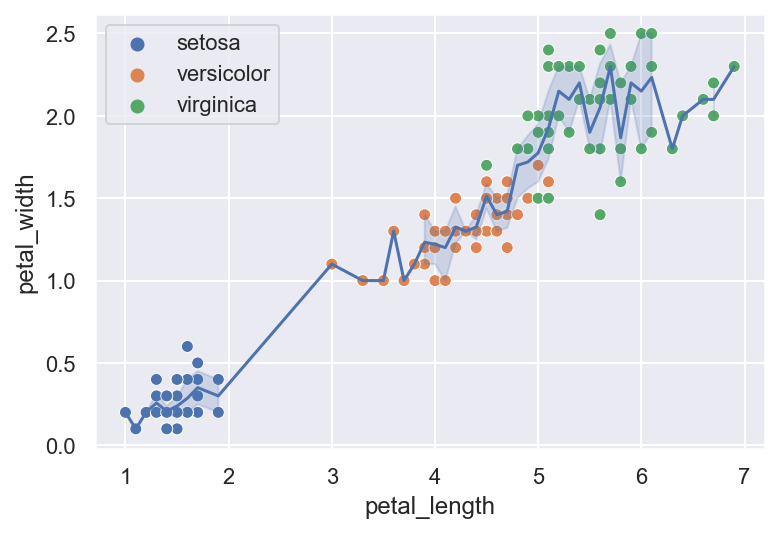

In [56]:
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species')
sns.lineplot(x='petal_length',y='petal_width',data=iris)
plt.show()

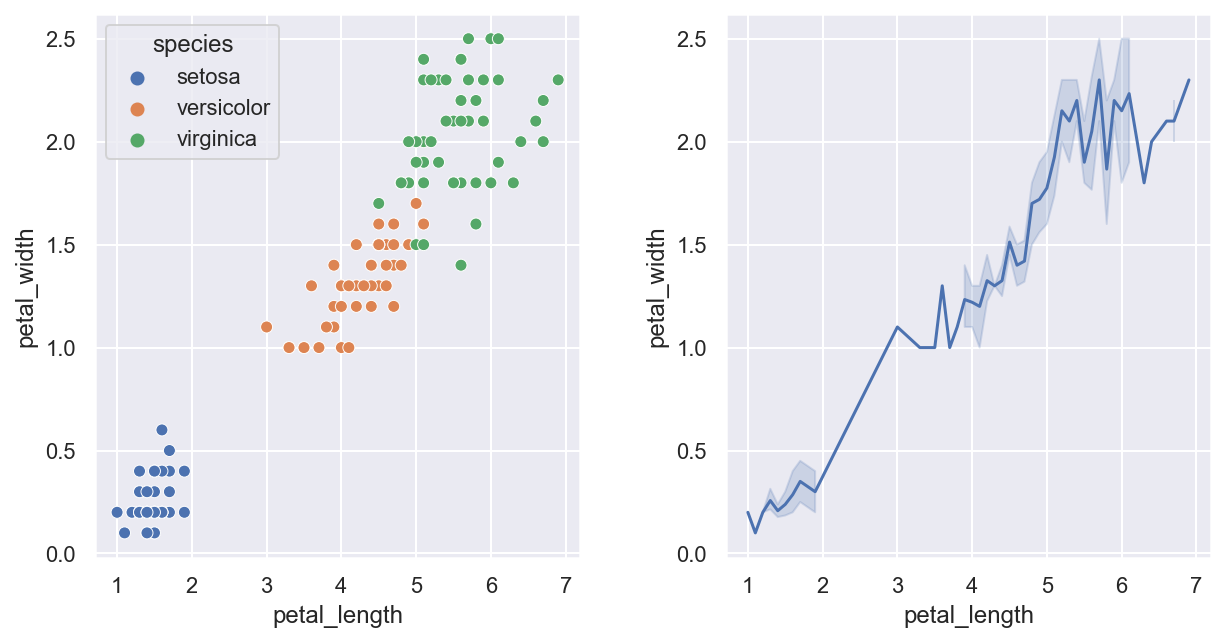

In [61]:
fig, axes = plt.subplots(ncols=2,figsize=(10,5))
plt.subplots_adjust(wspace=0.3)
sns.scatterplot(x='petal_length',y='petal_width',data=iris,hue='species',ax = axes[0])
sns.lineplot(x='petal_length',y='petal_width',data=iris,ax = axes[1])
plt.show()

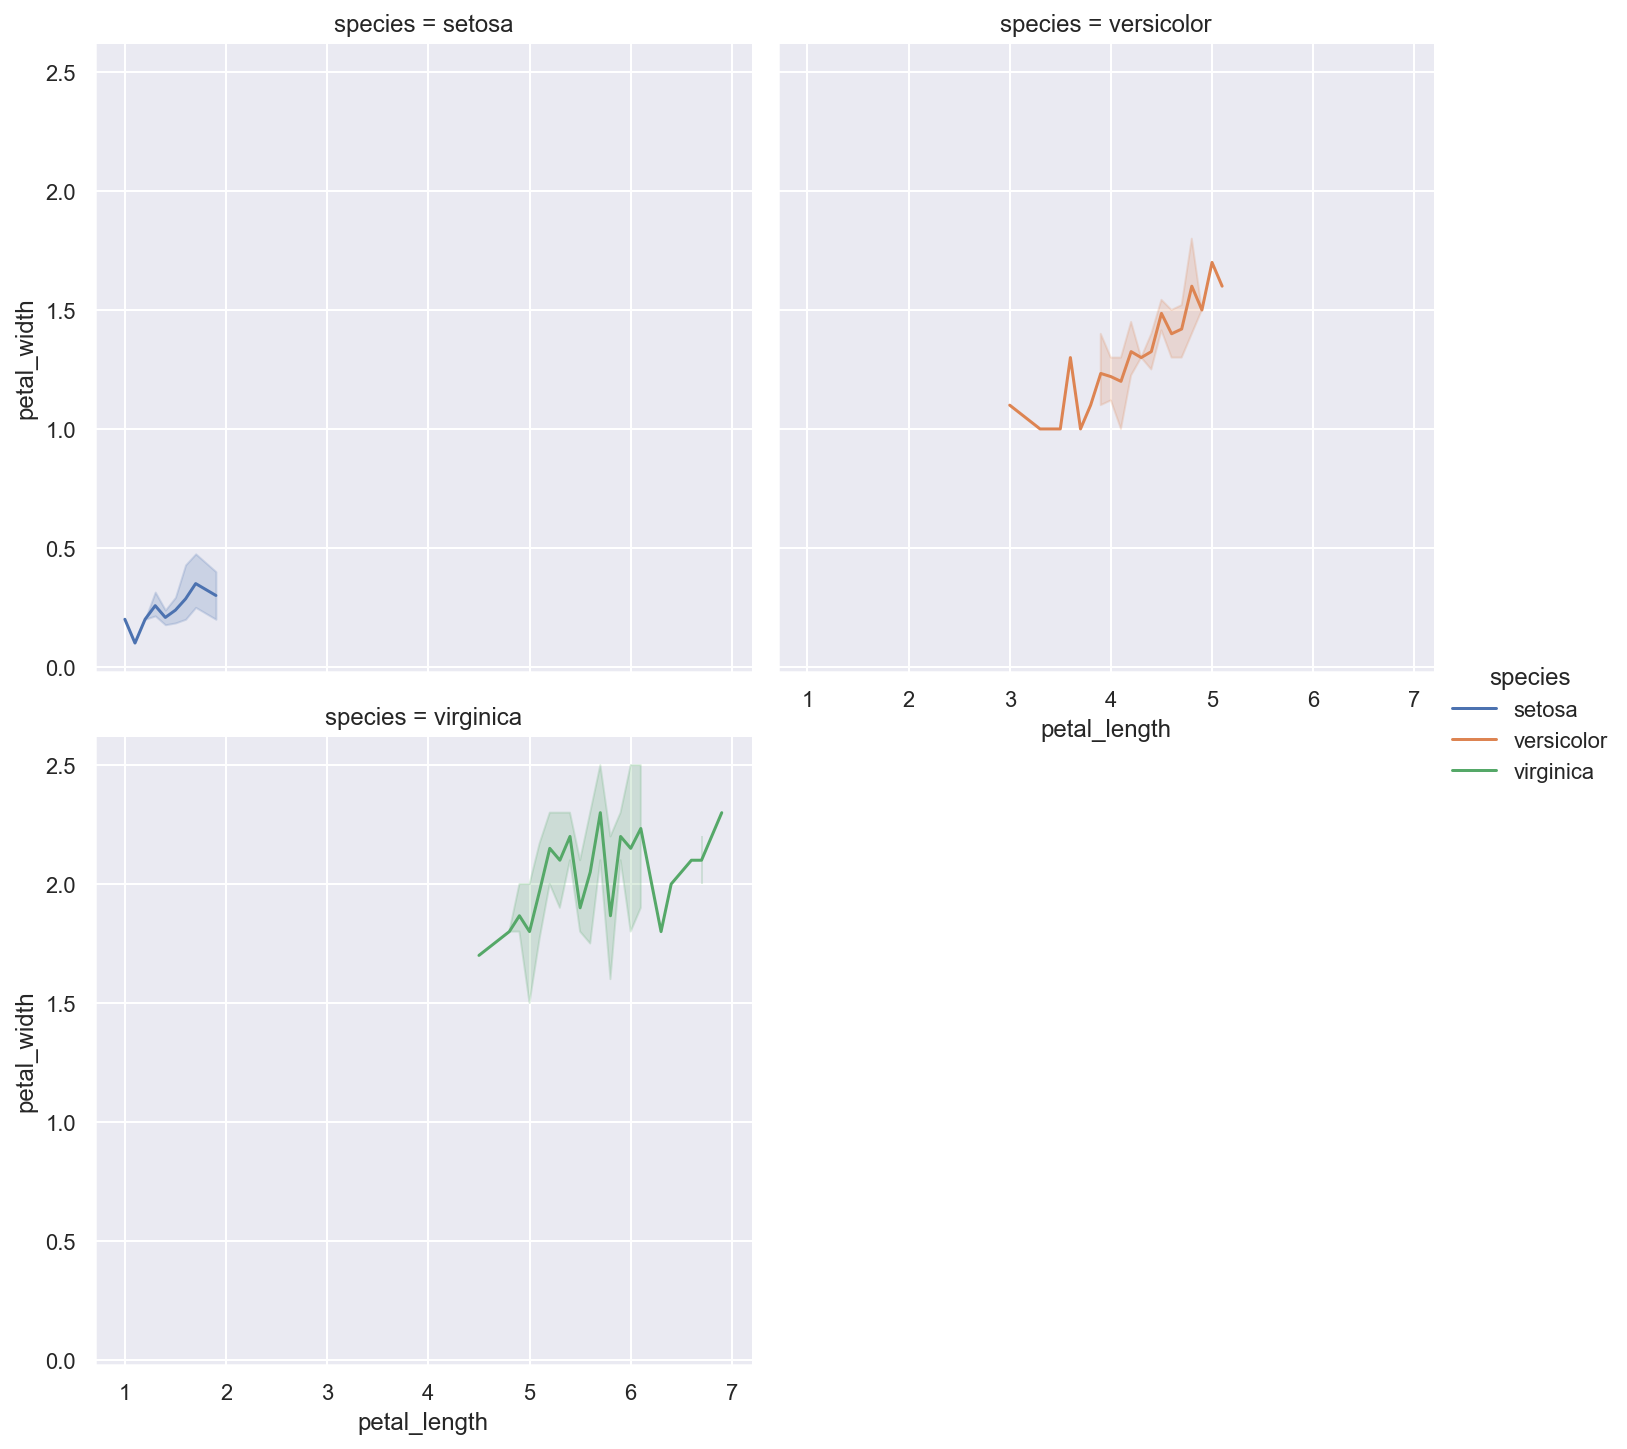

In [64]:
# lineplot을 서브플롯으로 표현 : relplot
sns.relplot(x='petal_length',y='petal_width',data=iris,hue='species',
           kind='line', # 기본값은 scatter
           col='species', # col 단위로 서브플롯 표현
           col_wrap=2) # 한줄에 표현될 서브플롯 수
plt.show()

**2) categorycal plots: 범주형 그래프**

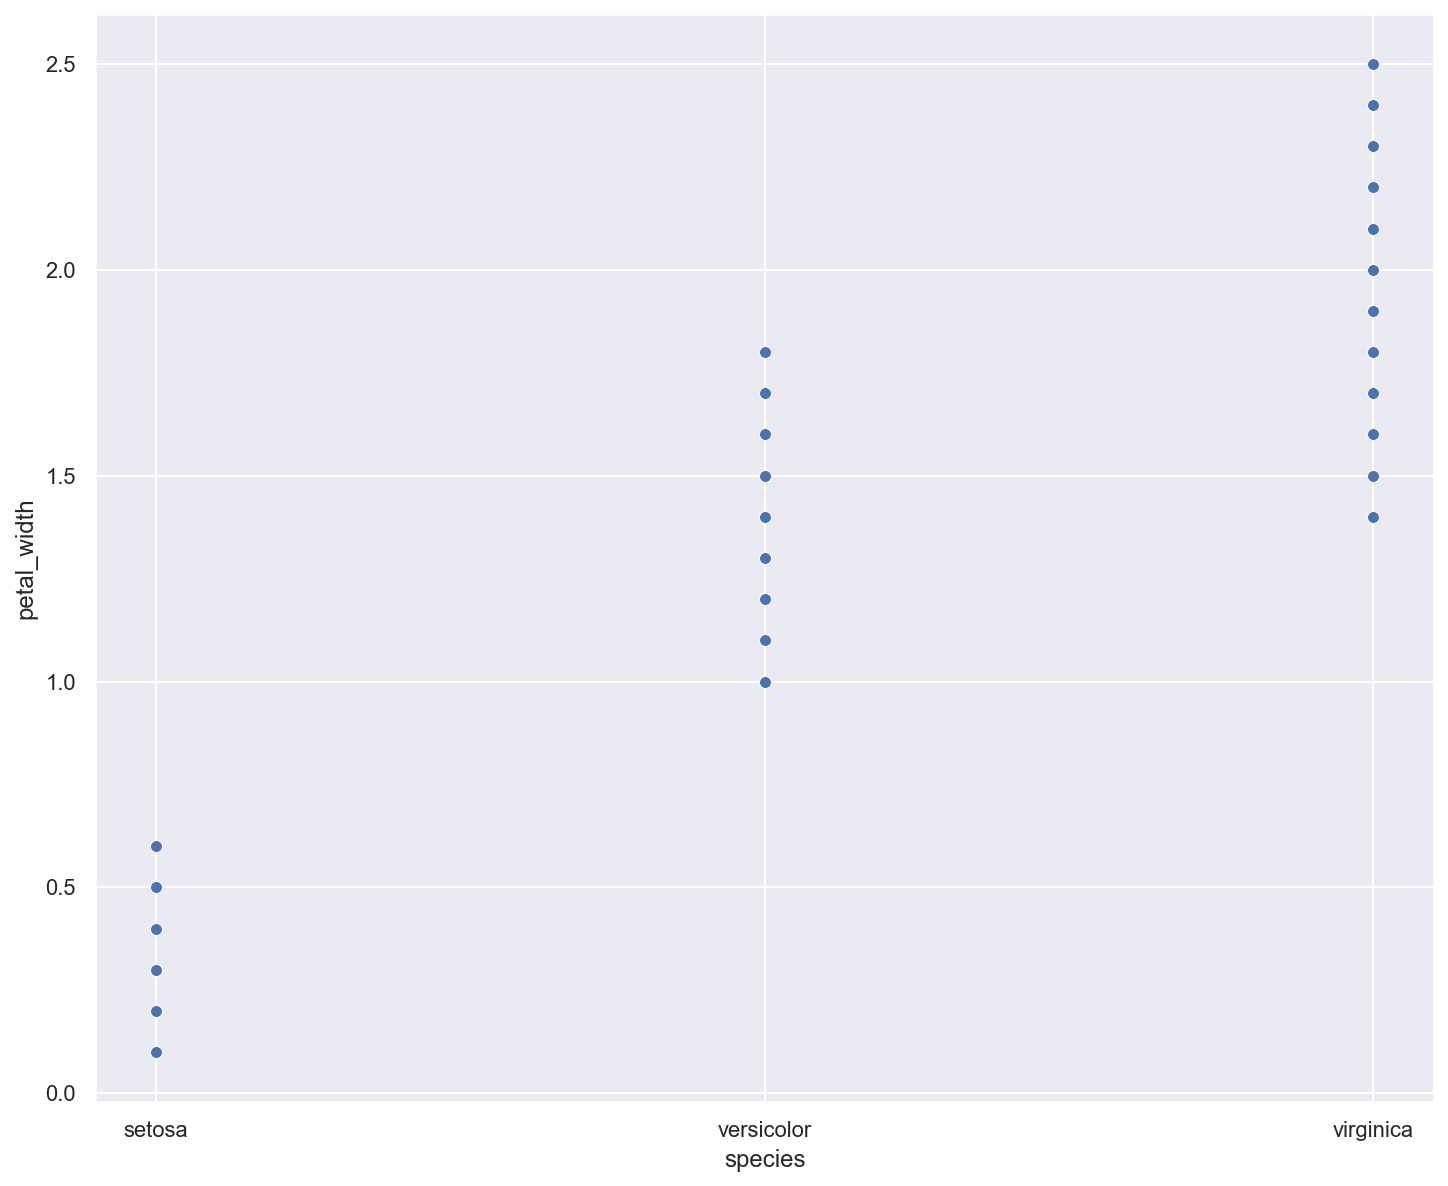

In [74]:
# x축이 범주형 데이터일 경우 scatterplot은 적합하지 않다. 다른 종류의 그래프를 사용해야함.
plt.figure(figsize=(12,10))
sns.scatterplot(x='species',y='petal_width',data=iris)
plt.show()

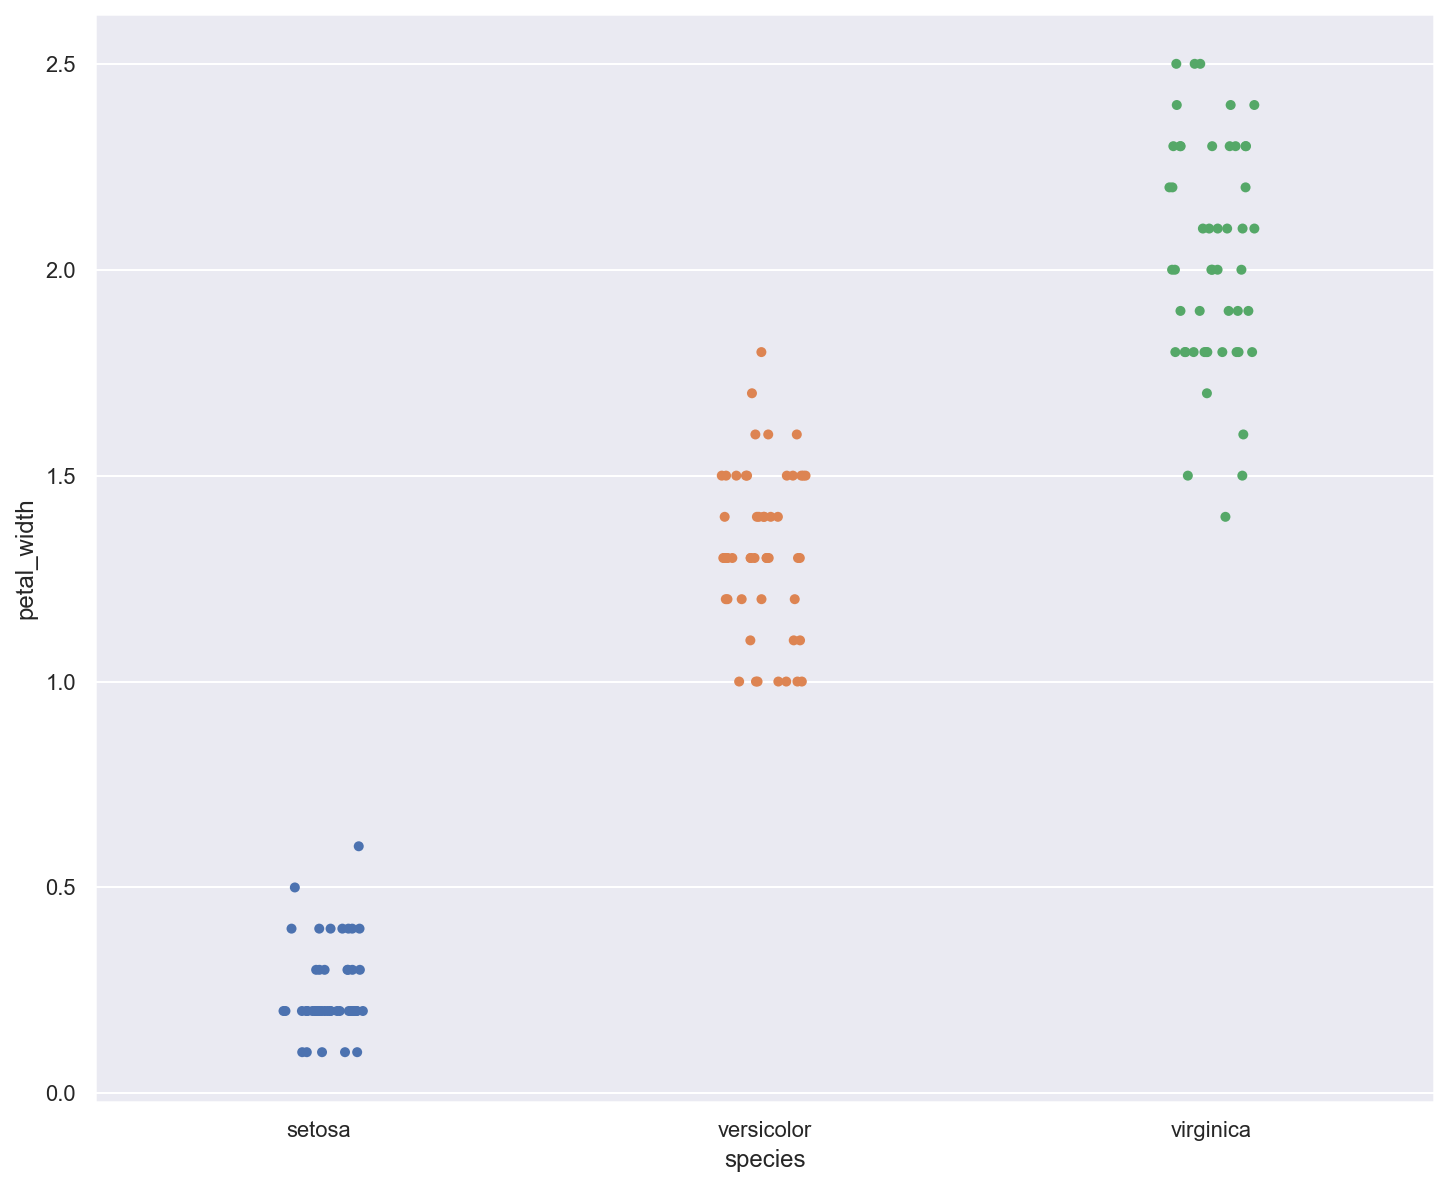

In [73]:
# x축이 범주형일때 사용하는 산점도 1
plt.figure(figsize=(12,10))
sns.stripplot(x='species',y='petal_width',data=iris)
plt.show()

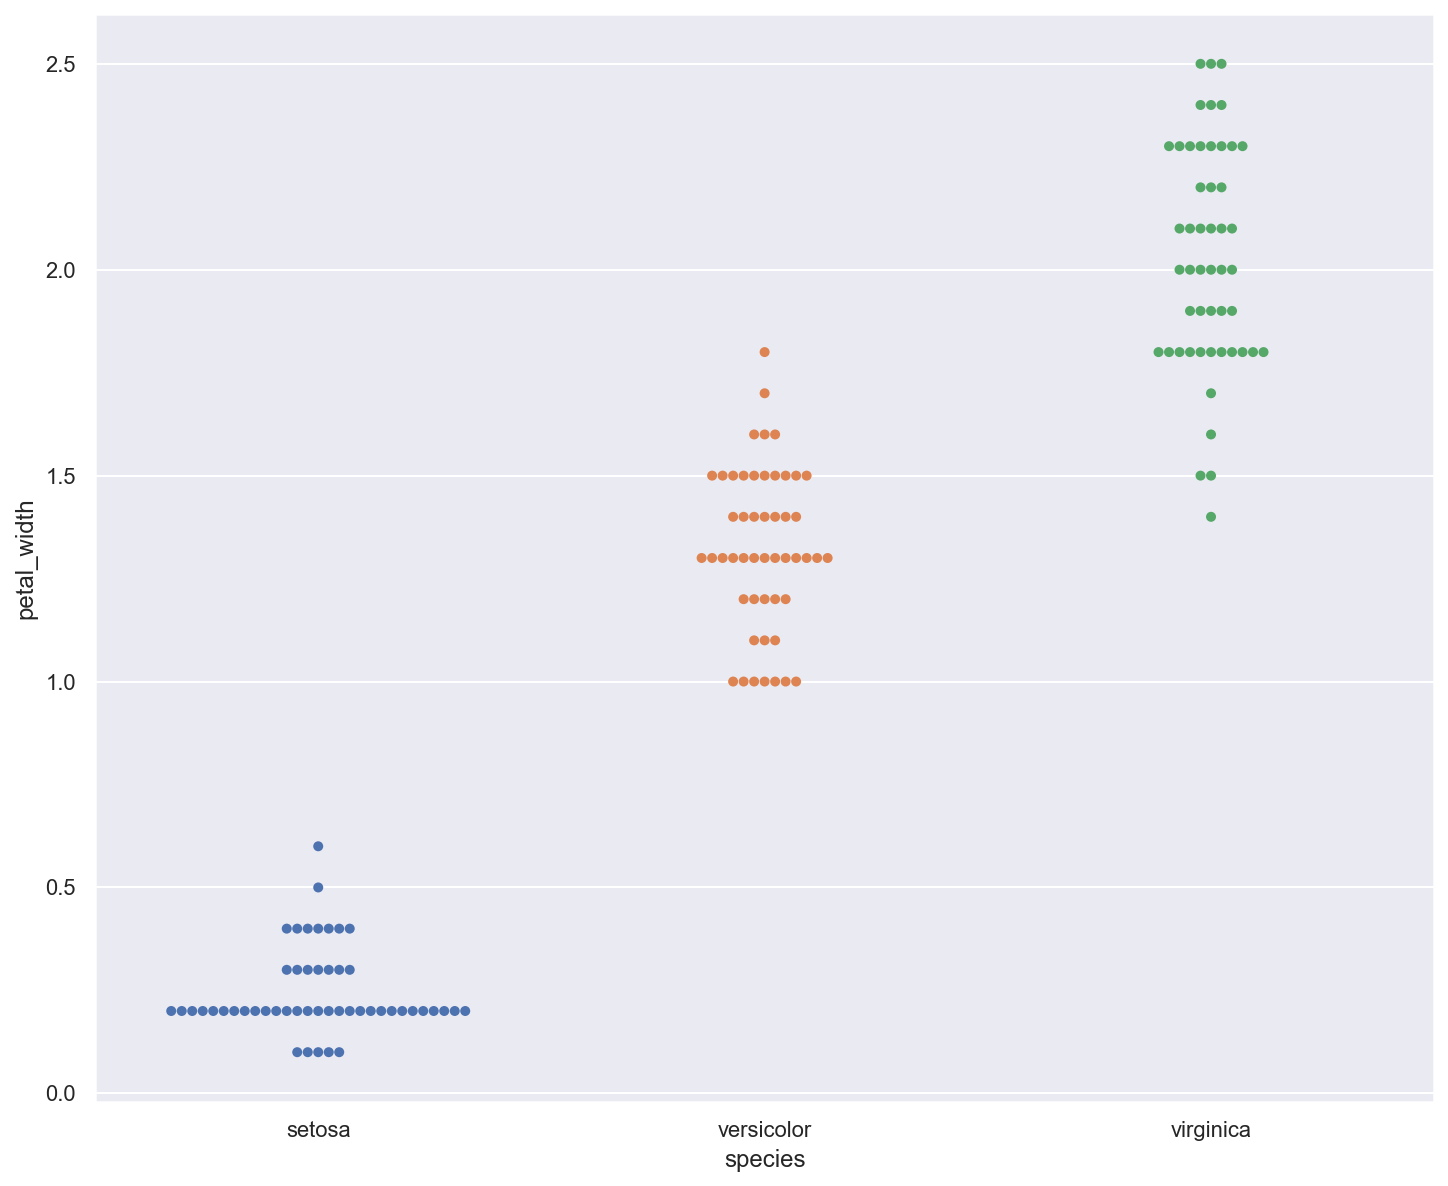

In [72]:
# x축이 범주형일때 사용하는 산점도 2 : 산점도들이 중첩되지 않게한다.
plt.figure(figsize=(12,10))
sns.swarmplot(x='species',y='petal_width',data=iris)
plt.show()

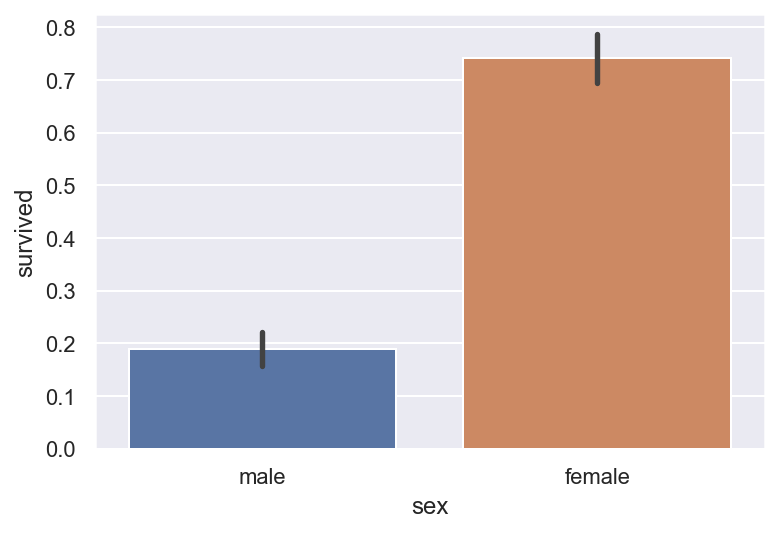

In [78]:
# titanic의 성별 survived의 평균을 막대그래프로(기본은 평균값,ci = 95프로 신뢰구간 추정)
sns.barplot(x='sex',y='survived',data=titanic)
plt.show()

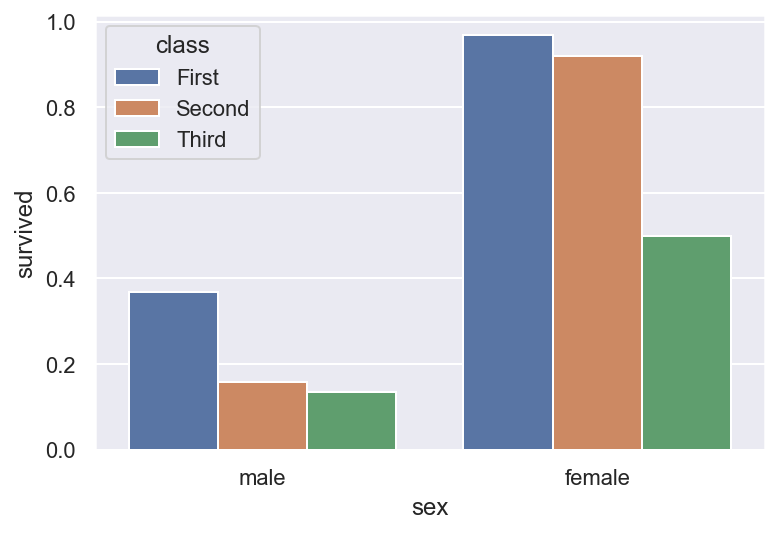

In [80]:
# class별로 따로 성별 생존률 평균(ci=신뢰도 추정)
sns.barplot(x='sex',y='survived',data=titanic,hue='class',ci=None)
plt.show()

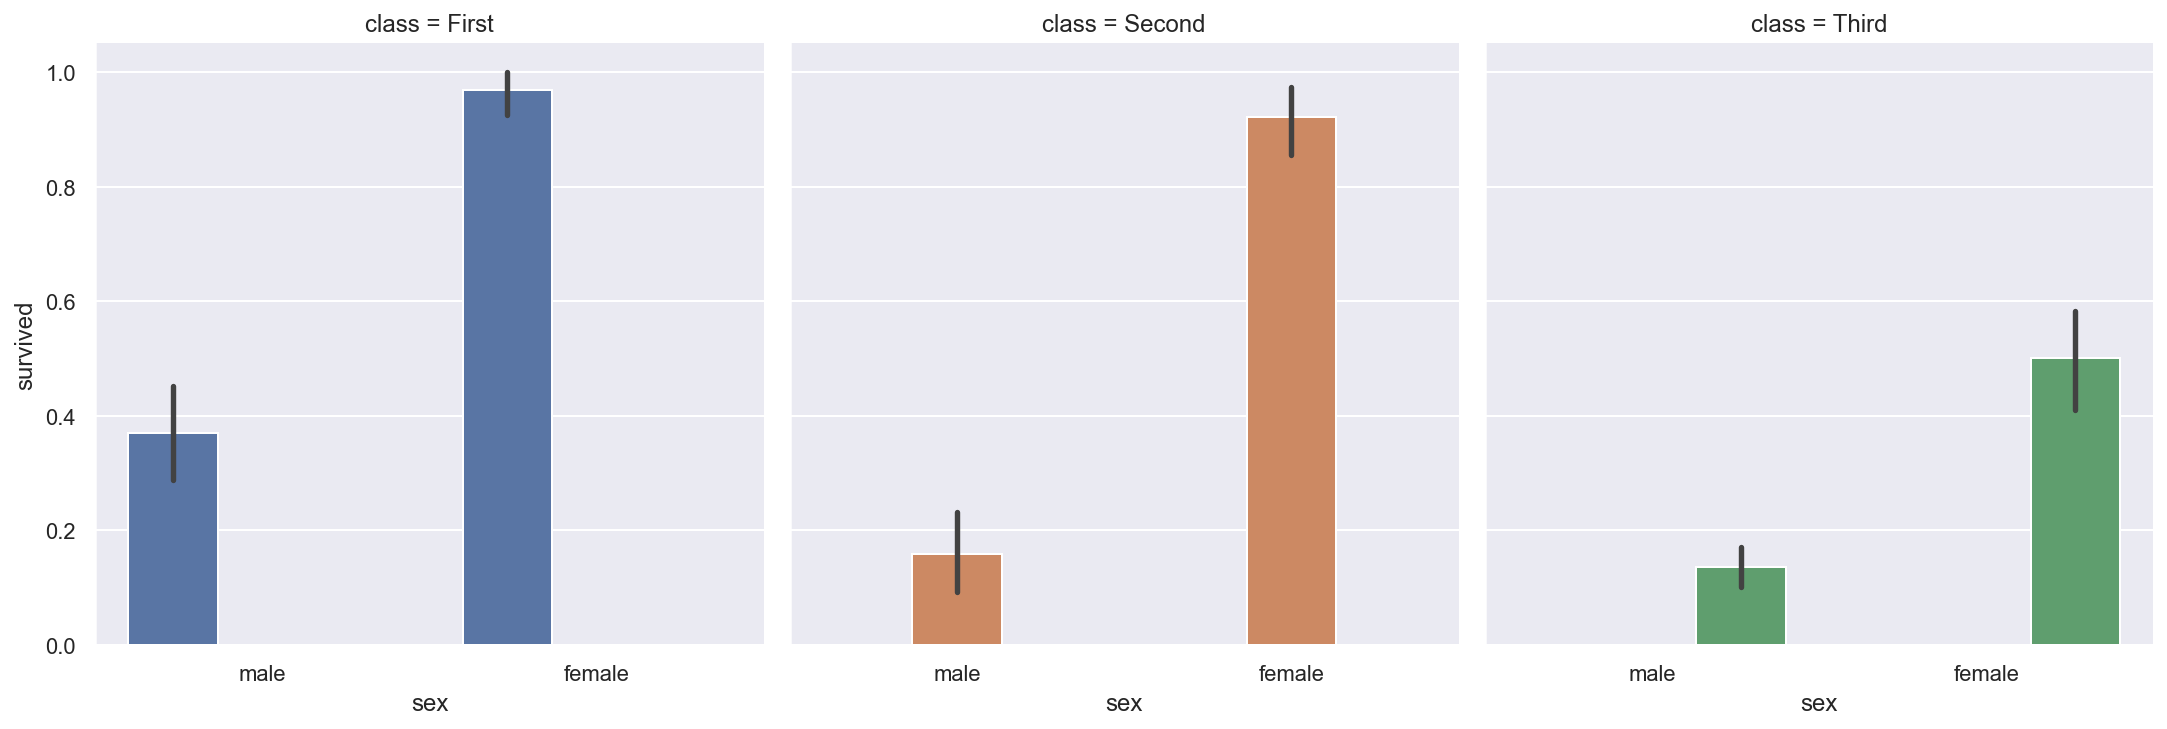

In [83]:
#barplot을 서브플롯으로 : catplot
sns.catplot(x='sex',y='survived',data=titanic,hue='class',
           kind='bar',col='class')
plt.show()

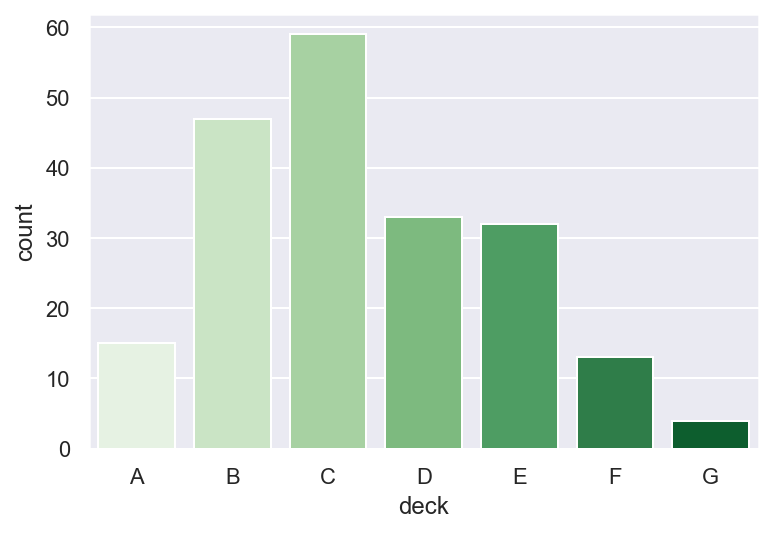

In [86]:
# deck별 관측수를 막대그래프로 (카운트)
sns.countplot(x='deck',data=titanic,palette='Greens')
plt.show()

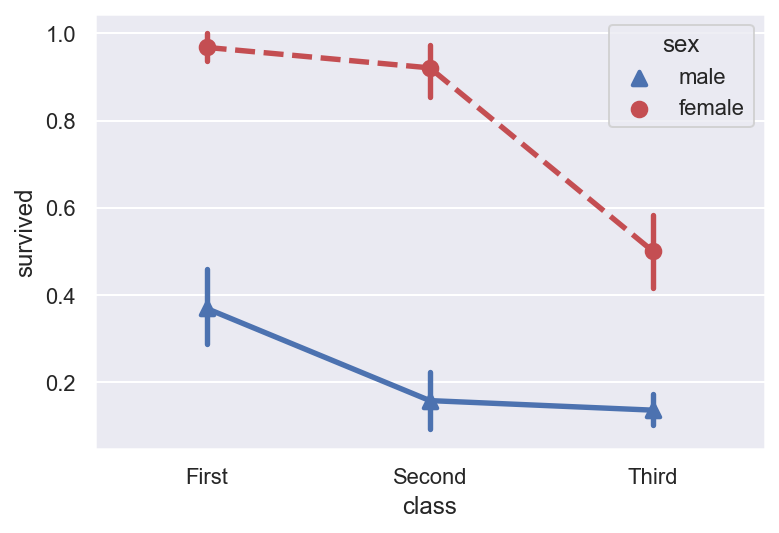

In [89]:
#class 별 survived 값을 sex별로 pointplot
sns.pointplot(x='class',y='survived',hue='sex',data=titanic,
              palette={'male':'b','female':'r'},
              markers=['^','o'],linestyles=['-','--'])
plt.show()

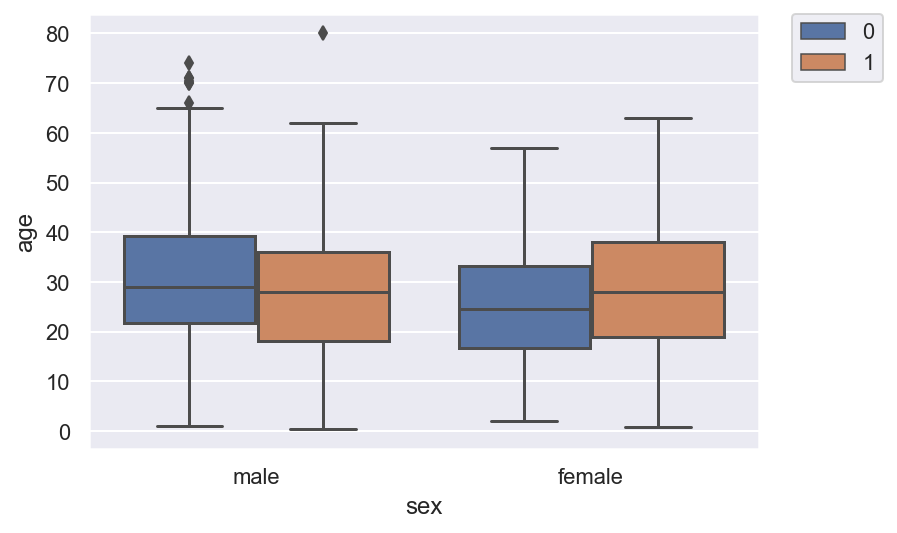

In [96]:
#boxplot,violinplot,boxenplot
sns.boxplot(x='sex',y='age',data=titanic,hue='survived')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

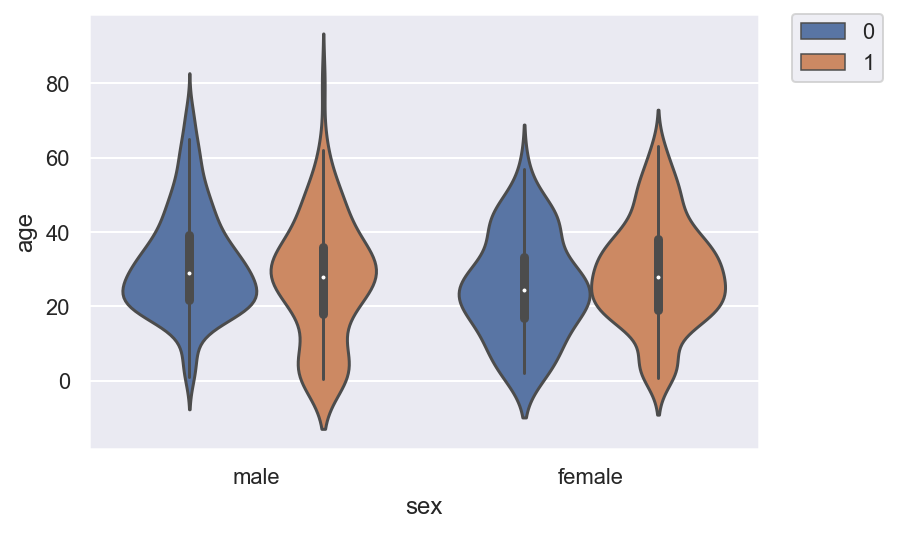

In [98]:
sns.violinplot(x='sex',y='age',data=titanic,hue='survived')
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

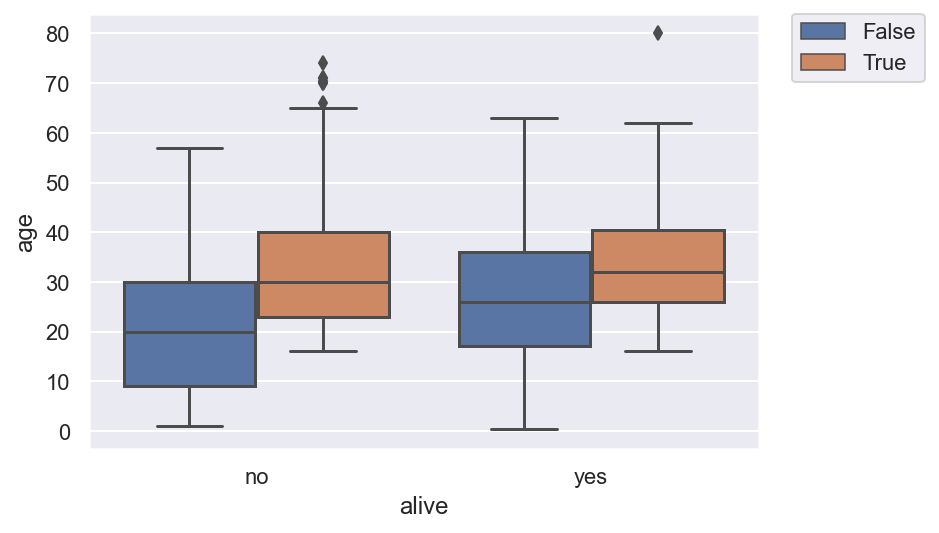

In [101]:
# 박스플롯일때
sns.boxplot(x='alive',y='age',hue='adult_male',data=titanic)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

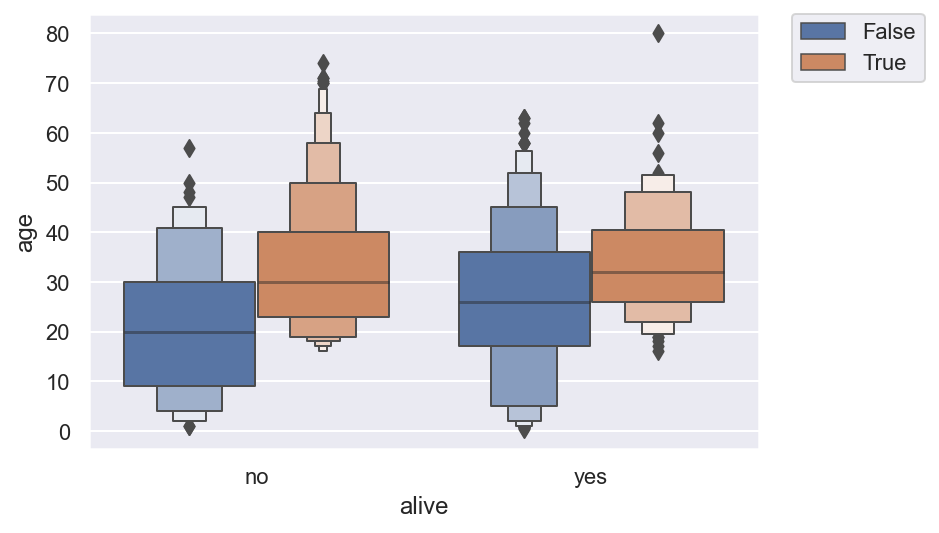

In [103]:
# 박슨플롯일때 분포까지 보여준다
sns.boxenplot(x='alive',y='age',hue='adult_male',data=titanic)
plt.legend(bbox_to_anchor=(1.05,1),loc=2,borderaxespad=0)
plt.show()

**3)쌍관계그래프**

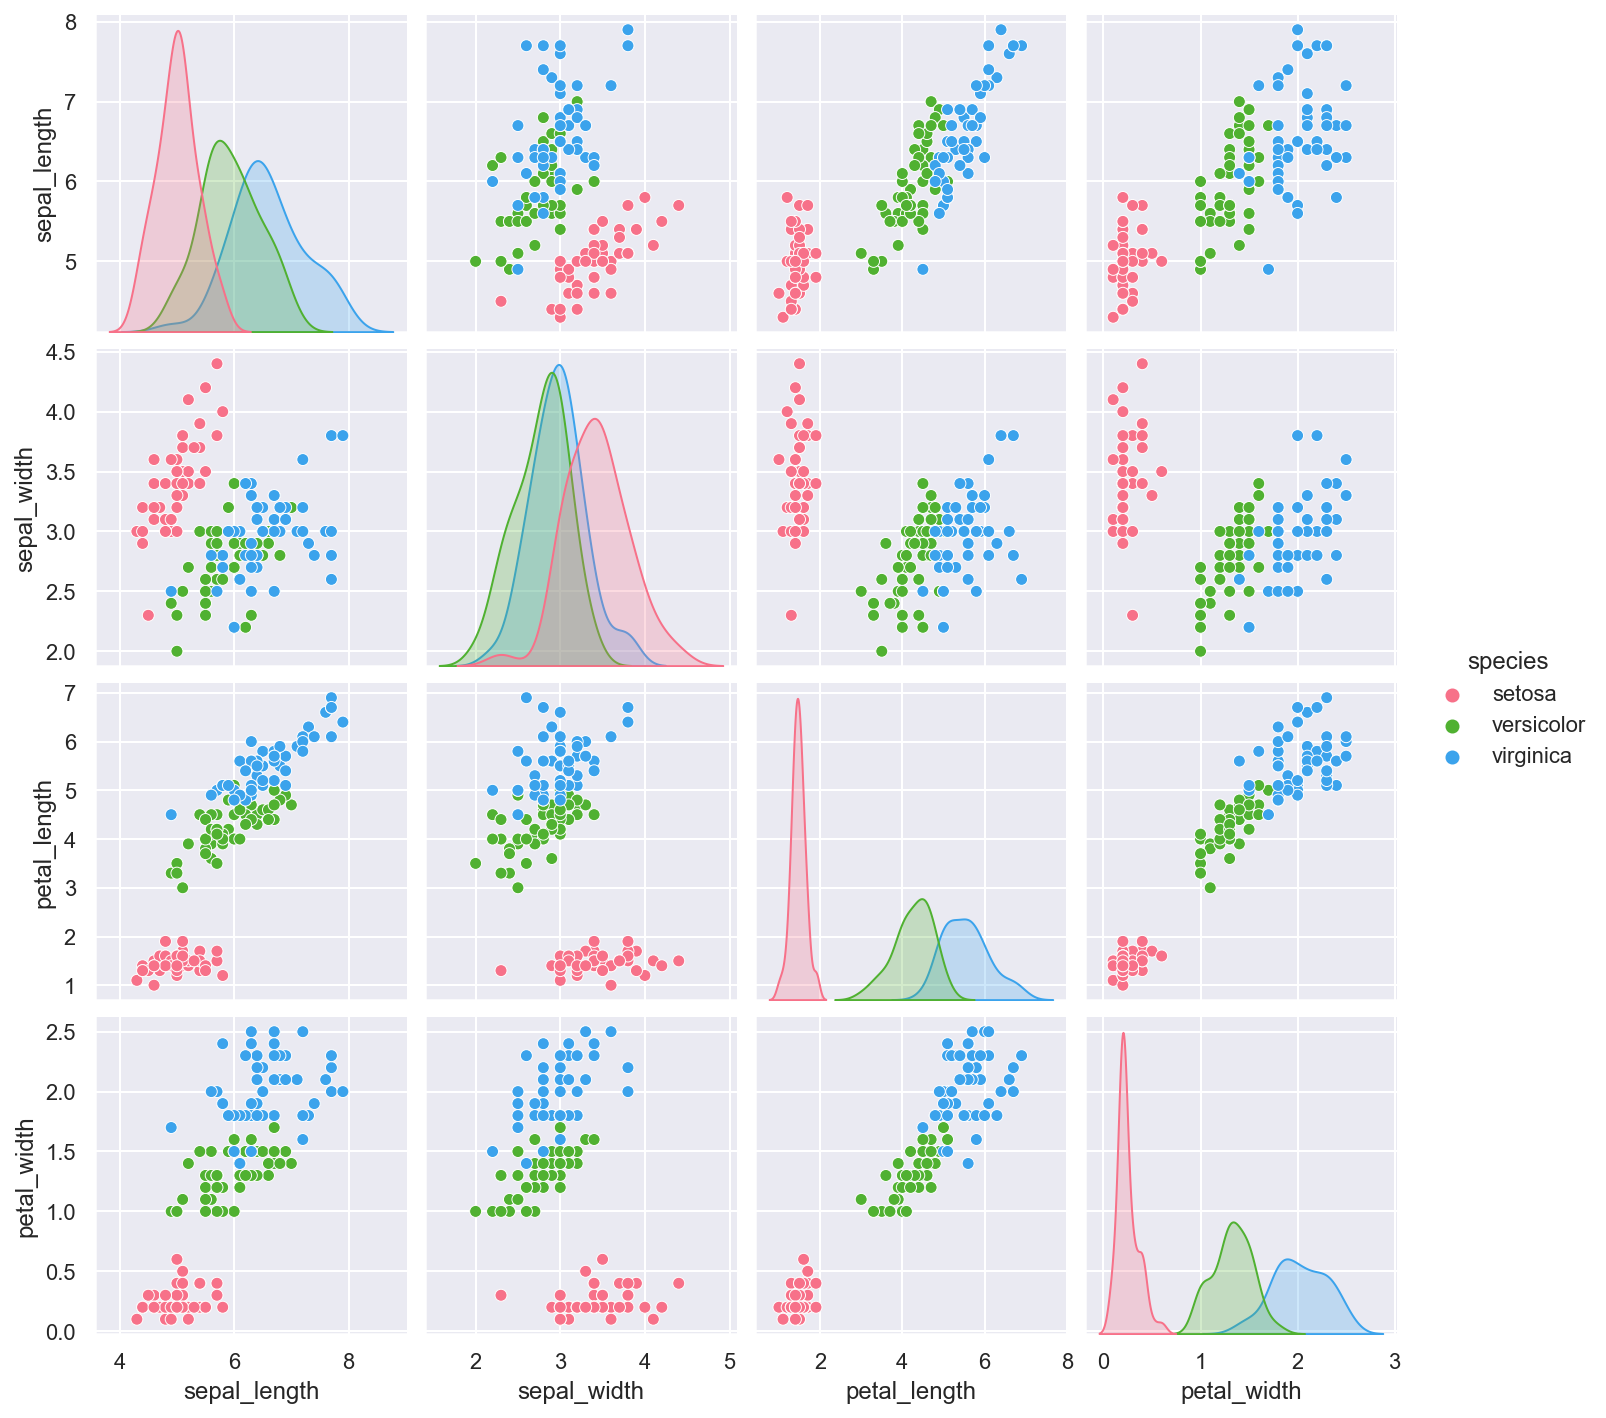

In [106]:
sns.pairplot(data=iris,hue='species',palette='husl')
plt.show()

In [107]:
import numpy as np
x = np.random.randn(100)

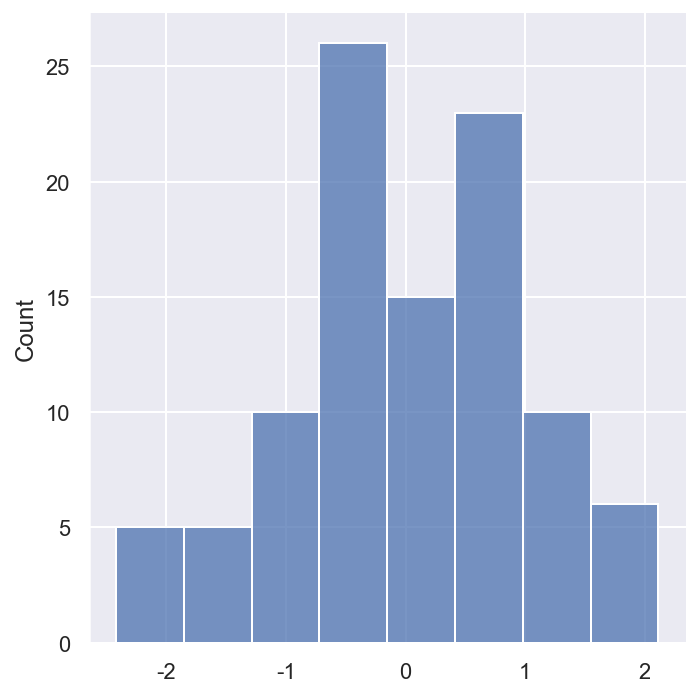

In [110]:
sns.displot(x,kde=False)

**4) 회귀 그래프**

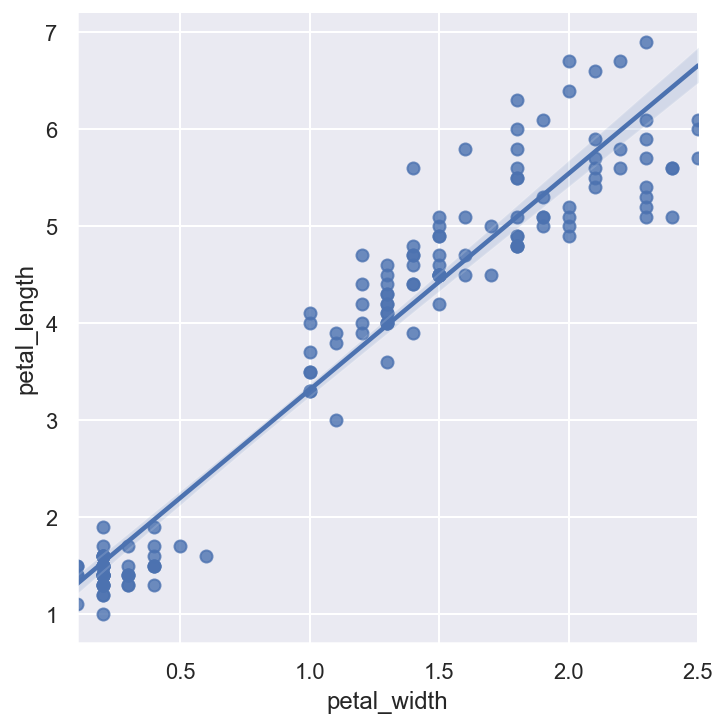

In [126]:
# 회기 모형을 만드는 함수 : lmplot,regplot
sns.lmplot(x='petal_width',y='petal_length',data=iris)
plt.show()

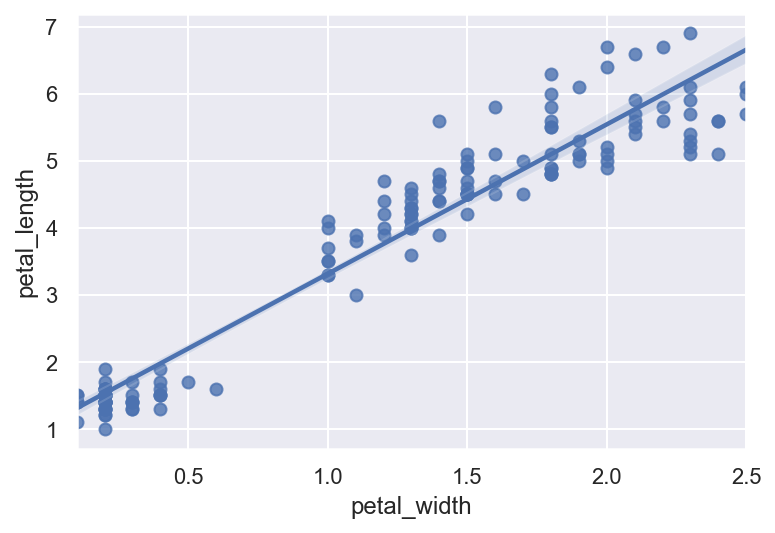

In [125]:
# regplot, 은 hue 못씀
sns.regplot(x='petal_width',y='petal_length',data=iris)
plt.show()

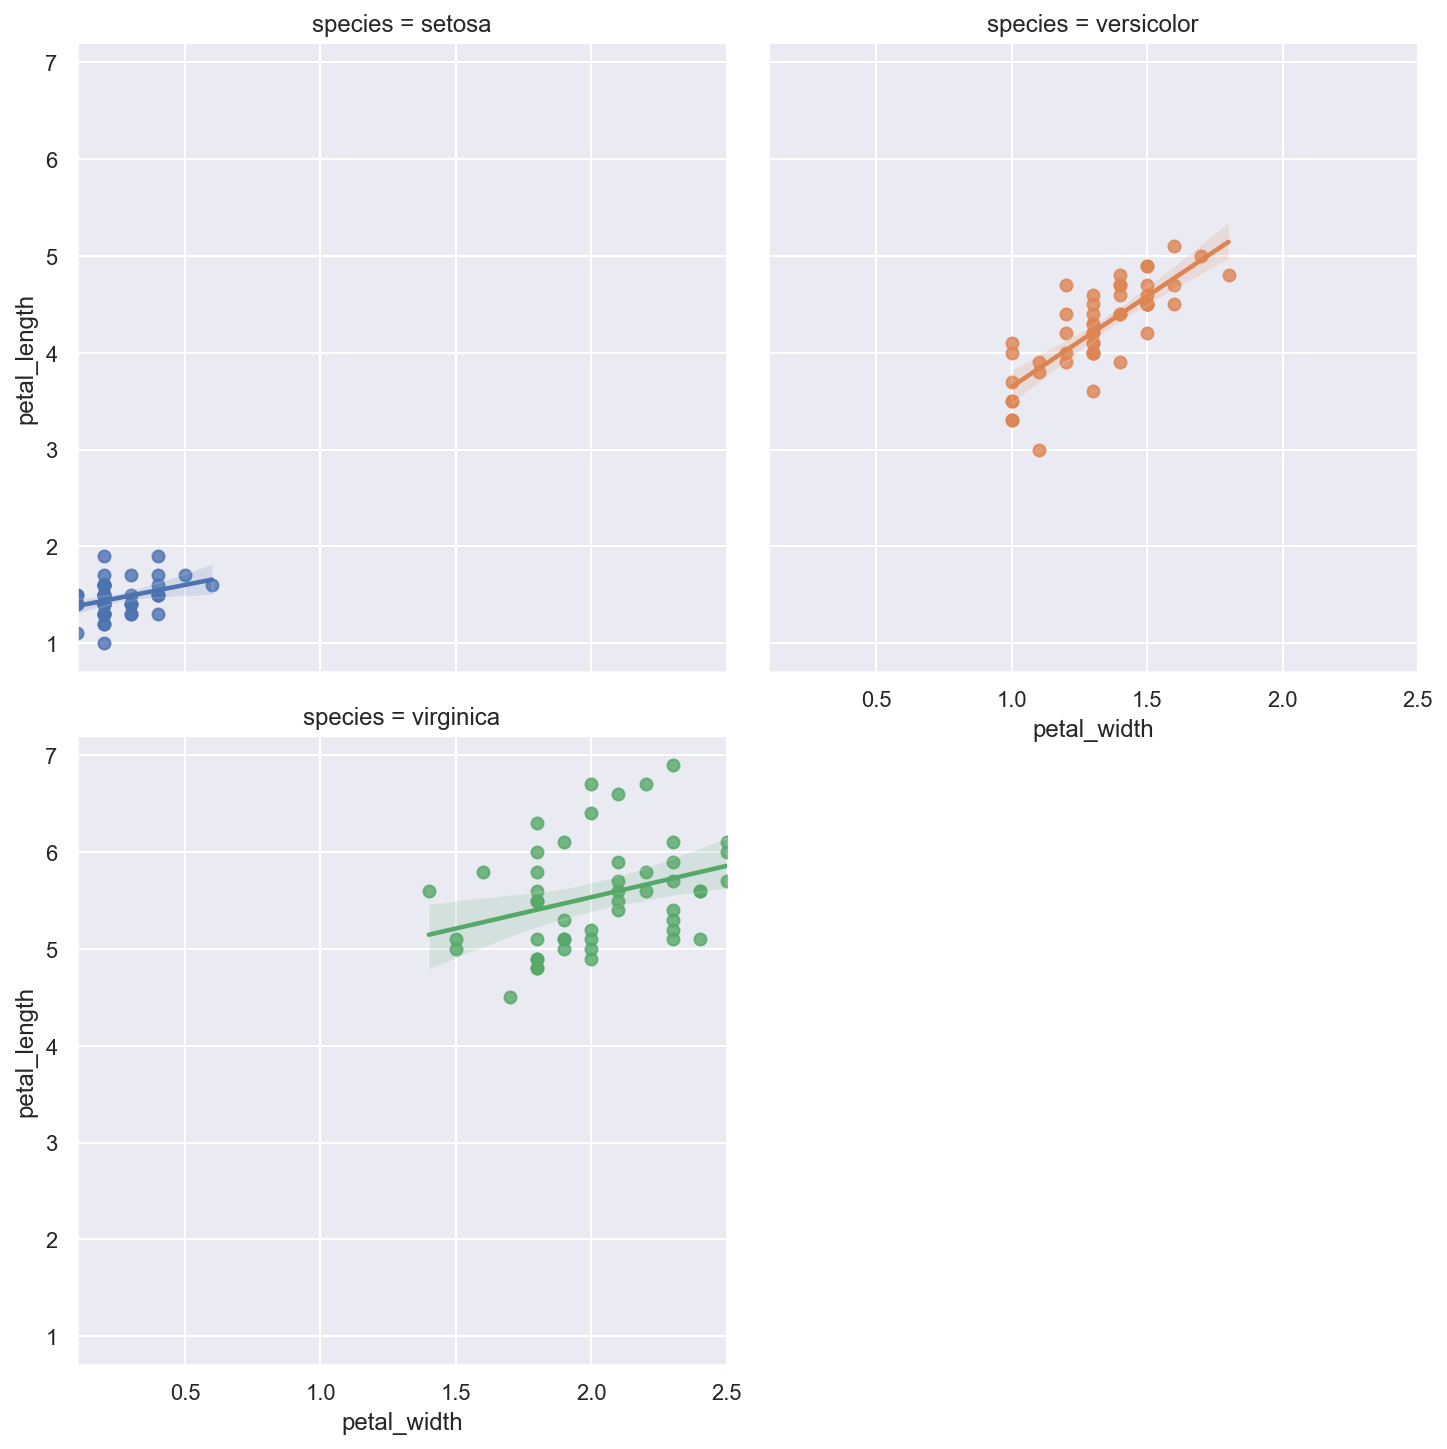

In [130]:
sns.lmplot(x='petal_width',y='petal_length',data=iris,hue='species',col='species',col_wrap=2)
plt.show()

**5) 행렬그래프**

In [131]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


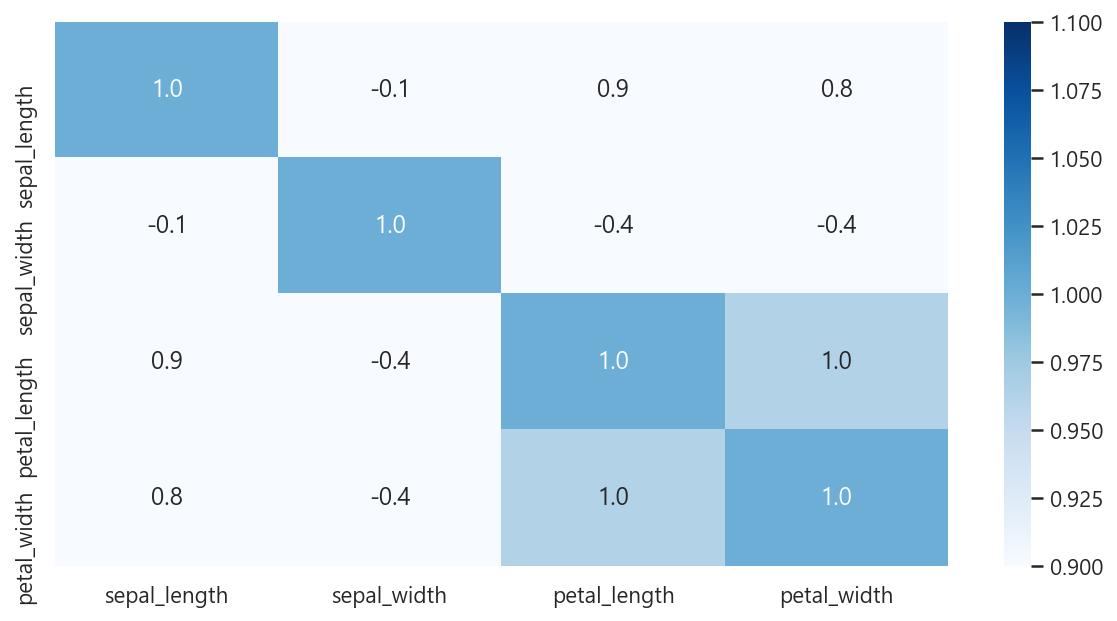

In [138]:
plt.figure(figsize=(10,5))
sns.heatmap(iris.corr(),vmin=1,vmax=1,annot=True,cmap='Blues'
           ,fmt='.1f')
plt.show()

## 3.4 다중 그래프를 위한 FacetGrid

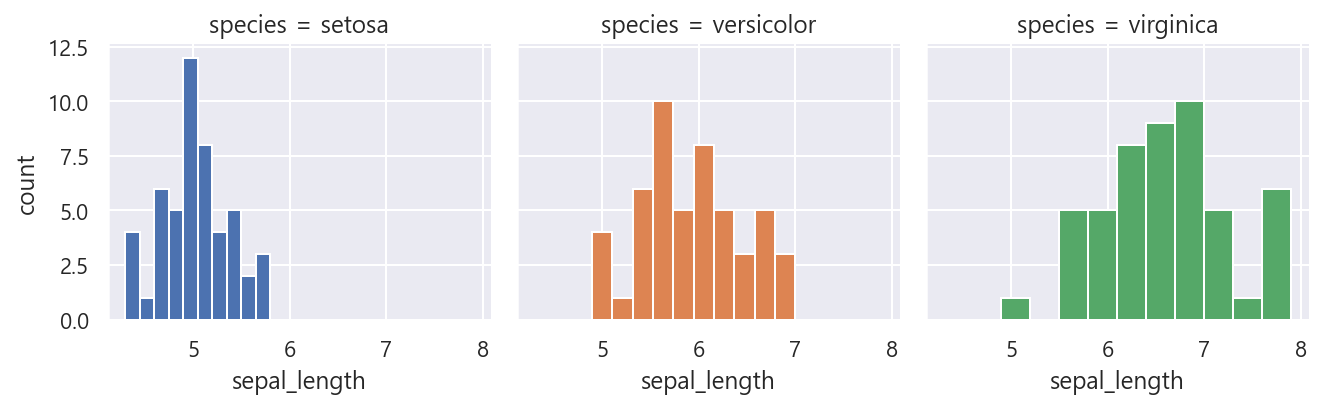

In [142]:
g = sns.FacetGrid(iris,col='species',hue='species')
g.map(plt.hist,'sepal_length')
g.set_axis_labels(y_var='count')
plt.show()

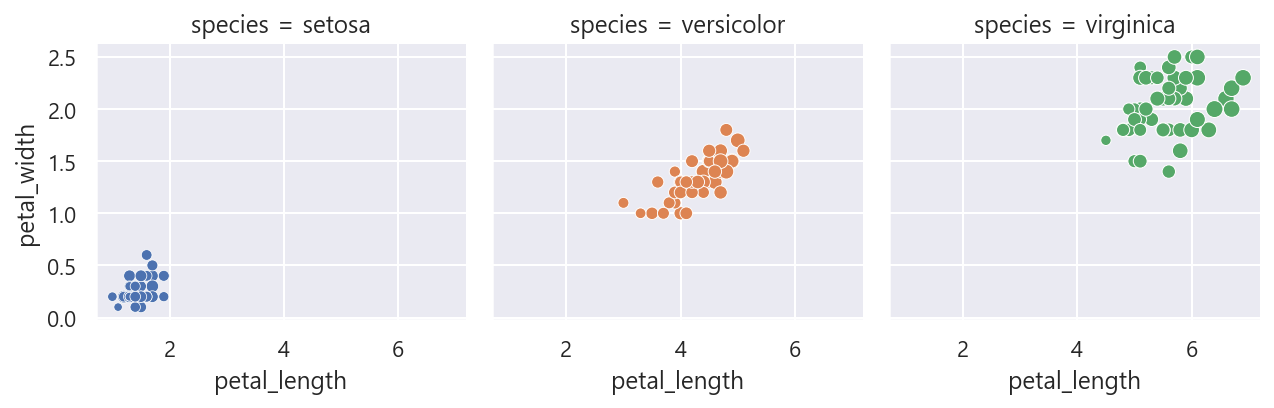

In [145]:
g = sns.FacetGrid(iris,col='species',hue='species')
g.map(sns.scatterplot,'petal_length','petal_width', size=iris.sepal_length)
plt.show()